In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [3]:
db=pd.read_csv('diabetes.csv')
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
db.shape

(768, 9)

In [5]:
db.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
db.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
db['Outcome'].head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
X=db.drop('Outcome',axis=1)
y=db['Outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [10]:
X_train.shape

(537, 8)

# Decision Tree Classifier

In [11]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [12]:
ccp_alphas

array([0.        , 0.00117939, 0.00159617, 0.00165529, 0.00173805,
       0.00173805, 0.00173805, 0.00175476, 0.00181987, 0.00184495,
       0.00223464, 0.00223464, 0.00223464, 0.00239425, 0.00248293,
       0.00248293, 0.00248293, 0.00269354, 0.0027933 , 0.00283763,
       0.00297952, 0.00297952, 0.00331057, 0.00341403, 0.0034379 ,
       0.0034952 , 0.00349791, 0.00350031, 0.00352837, 0.00353725,
       0.00369471, 0.00395052, 0.00399042, 0.00419615, 0.00446927,
       0.00446927, 0.00448857, 0.00472939, 0.00496586, 0.00496586,
       0.004966  , 0.00526607, 0.00534722, 0.00536756, 0.00558407,
       0.0057851 , 0.0057935 , 0.00624843, 0.01038992, 0.01148145,
       0.01413395, 0.01754131, 0.03499904, 0.07989694])

In [13]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07989694415988807


In [14]:
cvres=[]
for a in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha= a)
    cvclf = cross_validate(clf, X_train, y_train, cv=5, scoring='accuracy')
    cvres.append(cvclf['test_score'].mean())

In [15]:
len(cvres)

54

Text(0, 0.5, 'Acc')

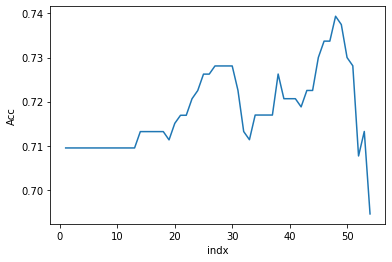

In [16]:
plt.plot(list(range(1,55)),cvres)
plt.xlabel('indx')
plt.ylabel('Acc')

In [17]:
np.argmax(cvres)

47

In [18]:
al=ccp_alphas[48]

In [19]:
our_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=al).fit(X_test,y_test)

In [20]:
accuracy_score(y_test, our_clf.predict(X_test))

0.8917748917748918

In [21]:
out=export_text(our_clf,feature_names=list(X.columns))
print(out)

|--- Glucose <= 139.50
|   |--- BMI <= 43.15
|   |   |--- BMI <= 27.35
|   |   |   |--- class: 0
|   |   |--- BMI >  27.35
|   |   |   |--- Glucose <= 101.00
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  101.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.92
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.24
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.24
|   |   |   |   |   |   |--- BMI <= 33.90
|   |   |   |   |   |   |   |--- Insulin <= 22.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Insulin >  22.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BMI >  33.90
|   |   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.92
|   |   |   |   |   |--- class: 1
|   |--- BMI >  43.15

(-1, 8)

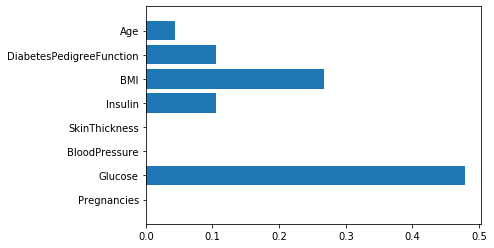

In [22]:
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),our_clf.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)

# Bagging Classifier

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

In [29]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        n_estimators=400,random_state=0).fit(X_train, y_train)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(clf.predict(X_test),y_test)

0.7792207792207793

# Random Forest Classifier

In [33]:
rfclf = RandomForestClassifier(n_estimators=400, 
                               max_features='sqrt',random_state=0).fit(X_train,y_train)

Can do slightly better with max_depth=2

In [34]:
accuracy_score(rfclf.predict(X_test),y_test)

0.7835497835497836

# Gradient Boosting Classifier

In [36]:
bst_clf = GradientBoostingClassifier(n_estimators=600, 
                                     learning_rate=0.01,
                                     max_depth=1, 
                                     random_state=0).fit(X_train, y_train)

In [37]:
accuracy_score(bst_clf.predict(X_test),y_test)

0.8008658008658008

In [39]:
single_tree_clf = DecisionTreeClassifier(random_state=0)
path = single_tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [40]:
cvres=[]
for a in ccp_alphas:
    st_clf = DecisionTreeClassifier(random_state=0, ccp_alpha= a)
    cvclf = cross_validate(st_clf, X_train, y_train, cv=5, scoring='accuracy')
    cvres.append(cvclf['test_score'].mean())

In [43]:
np.argmax(cvres)

47

In [44]:
al=ccp_alphas[np.argmax(cvres)]

In [46]:
our_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=al).fit(X_train,y_train)

In [47]:
accuracy_score(our_clf.predict(X_test),y_test)

0.7359307359307359